In [ ]:
## Use for google colab
#For access to Google Drive files
from google.colab import files
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
 
#For saving to Google Drive
from google.colab import drive
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
Gdrive = GoogleDrive(gauth)
 
drive.mount('/content/drive',force_remount=True)

# Delta-X Applications Workshop #
## Exploring SLC L1 products ##
In this notebook we take a look at the Single Look Complex (SLC) RADAR images acquired by UAVSAR for the Delta-X campaign. 

    To access the data please visit ORNL DAAC https://daac.ornl.gov/
    
 <p align="left">
  <img width="600" src="images/ornldaac_main.png">
</p>     
<p style="text-align: center;">
    (ORNL main page)
</p>

    SLC images and other data can be downloaded after creating an account and login in.
    
 <p align="left">
  <img width="600" src="images/ornldaac_login.png">
</p>     
<p style="text-align: center;">
    (ORNL login)
</p>  
    
    If you dont have an account, go ahead and register.
    
 <p align="left">
  <img width="600" src="images/ornldaac_register.png">
</p>     
<p style="text-align: center;">
    (ORNL registration)
</p> 
    
    After registering and loging in the data can be accessed.
    Delta-X: UAVSAR Single Look Complex (SLC) Stack L1 Products, can be found at
    https://daac.ornl.gov/cgi-bin/dsviewer.pl?ds_id=1984
    
 <p align="left">
  <img width="600" src="images/deltax_l1_slc.png">
</p>     
<p style="text-align: center;">
    (L1 SLC data)
</p>

    The map below shows the spatial coverage of each UAVSAR flight line acquired during the Delta-X campaign.  Map shows the Atchafalaya and Terrebone Basins along the southern coast of Louisiana, USA.
    
 <p align="left">
  <img width="600" src="images/uavsar_datacover.png">
</p>     
<p style="text-align: center;">
    (UAVSAR data coverage)
</p>

    Select the desired data click the download botton next to the name or add to the cart. 
    
 <p align="left">
  <img width="600" src="images/ornldaac_add2cart.png">
</p>     
<p style="text-align: center;">
    (Data download)
</p>
  
    After adding the desired data to the cart, the summary will look similar to the following example. 
    
 <p align="left">
  <img width="600" src="images/ornldaac_checkout.png">
</p>     
<p style="text-align: center;">
    (Data checkout)
</p>

    You will recevie an email letting you know that the download is ready, it will include a download link and will also provide the alternative to use wget. 
    
 <p align="left">
  <img width="600" src="images/download_sample_email.png">
</p>     
<p style="text-align: center;">
    (Download email)
</p>


### L1 SLC Data Characteristics

#### Link to dataset
https://daac.ornl.gov/DELTAX/guides/DeltaX_L1_UAVSAR_SLC_Stack.html

#### Data File Information
This dataset contains UAVSAR Level 1 (L1) Single Look Complex (SLC) stack products for Delta-X flight lines.
This L1 dataset is intended for users who are familiar with data from synthetic aperture radar, especially products from UAVSAR (https://uavsar.jpl.nasa.gov/). Contact UAVSAR for detailed information on how to interpret the files (https://uavsar.jpl.nasa.gov/cgi-bin/contact.pl).

These L1 data contain slant range single look complex (SLC), latitude/longitude/height, look vector, doppler, and metadata files. The data are provided in SLC stack format (*.slc) with associated annotation (*.ann), latitude-longitude-height (*.llh), look vector (*.lkv), and Doppler centroid-slant range (*.dop) files.  The single look complex (SLC) stacks are in the HH, HV, VH, and VV polarizations. The same area was sampled at approximately 30-minute intervals. The SLCs are not corrected for residual baseline (BU).

- Spatial Coverage:  Atchafalaya River and Terrebonne Basins in southern Louisiana
- Spatial Resolution: 0.8m (along- flight-line) by 1.7 m (slant range, along line-of-sight (LOS))
- Temporal Coverage:  2021-03-27 to 2021-04-18 and 2021-09-05 to 2021-09-13
- Temporal Resolution: estimates at 30-minute intervals
- File naming convention:
    - The SLC (*.slc) and annotation (*.ann) files are named according to the UAVSAR standard product file naming convention. Each SLC and annotation file name is in the following format:
    - {site name}_{line ID}_{flight ID}_{data take counter}_{acquisition date}_{band}{steering}{polarization}_{stack_number}_ {baseline correction}_{segment number}_{downsample factor}.slc
    - {site name}_{line ID}_{flight ID}_{data take counter}_{acquisition date}_{band}{steering}{polarization}_{stack_number}_ {baseline correction}.ann
    - The latitude-longitude-height (*.llh) files and look vector (*.lkv) files are named following the standard format:
    - {site name}_{line ID}_{stack number}_{baseline correction}_{segment number}_{downsample factor}.llh or .lkv
    - The Doppler centroid versus slant range (*.dop) files are named:
    - {site name}_{line ID}_{stack number}_{baseline correction}.dop
    - For all files, 
    - site name = "atchaf", "eterre" or "wterre"; 6-character alphanumeric site name assigned to the UAVSAR flight line.
    - line ID = 5-character flight line ID assigned to the UAVSAR flight line (Table 2, Fig 3). The first 3 characters are the aircraft heading in degrees from North, and the last 2 characters are an alphanumeric counter chosen to ensure uniqueness of the ID.
    - acquisition date = in format of YYMMDD, encoded as YY = the last two digits of the year, MM = month, DD = day of month, in UTC.


### For this example we explore a single UAVSAR acquisition
    1. Initialize the notebook using the necessary libraries. 
    2. Go to the work folder and observe that the necessary image files are there.
    3. Take a look at the image annotation file.
    4. Read SLC image. 
    5. Visualize data. 
    6. Generate a single array using the acquisition segments.

### 1. Initialize the notebook using the necessary libraries.

In [4]:
## 1. Initialize the notebook using the necessary libraries
import os
import numpy as np
import matplotlib.pyplot as plt
import gdal


### 2. Go to the work folder and observe that the necessary image files are there.

In [5]:
## 2. Go to the work folder and observe that the necessary image files are there.
# work_dir = '/content/drive/MyDrive/DeltaX_Workshop_2022/’ ## For google colab
work_dir = os.path.expanduser(r'/Users/cabrera/Documents/Projects/Deltax/open_data_workshop')
os.chdir(work_dir)
print('Go to directory:', work_dir)


Go to directory: /Users/cabrera/Documents/Projects/Deltax/open_data_workshop


In [7]:
!ls 

data                         images
deltax_slc_exploration.ipynb


In [8]:
!ls data/

wterre_34202_21028_017_210407_L090VV_02_BU.ann
wterre_34202_21028_017_210407_L090VV_02_BU_s1_1x1.slc
wterre_34202_21028_017_210407_L090VV_02_BU_s2_1x1.slc


### 3. Take a look at the image annotation file.

In [9]:
## 3. Take a look at the image annotation file
f = open("data/wterre_34202_21028_017_210407_L090VV_02_BU.ann", "r")
print(f.read())


; Parameter file for UAVSAR stackline wterre_34202_21028_017_210407_L090VV_02_BU 
; search for parameters/value rather than placement in file
;
; slc = single look complex slant range image
; slc_mag and slc_phase are derived from the same 8 bytes per pixel of the slc input file, 
; where the first 4 bytes contain the real part of the complex data and the second 4 bytes contain the imaginary part of the complex data
;
; llh = latitude/longitude/dem height of each pixel in the slc
; LAT/LONG/HGT are packed as 3 floating point values per slc pixel (data order: lat1 lon1 hgt1 lat2 lon2 hgt2 ...)
;
; lkv = look vector at the target pointing from the aircraft to the ground, in ENU (east, north, up) components
; look vector ENU components are packed as 3 floating point values per slc pixel (data order: east1 north1 up1 east2 north2 up2)
;
; Peg position is the nadir position of aircraft at the middle of the datatake
; Projection of image is relative to the flightline (S - along track positio

### 4. Read SLC image.

In [29]:
## 4. Read SLC image. 

# Segment 1
cols_s1 = 9900
rows_s1 = 66664  
# Read files
ds = np.memmap('data/wterre_34202_21028_017_210407_L090VV_02_BU_s1_1x1.slc', dtype=np.complex64)
slc_seg1 = ds.reshape(rows_s1, cols_s1) ## multi-band example
ds = None
# Extract backscatter and phase
backscatter_seg1 = np.abs(slc_seg1)
phase_seg_1 = np.angle(slc_seg1)

# Segment 2
cols_s2 = 9900
rows_s2 = 55408  
# Read files
ds = np.memmap('data/wterre_34202_21028_017_210407_L090VV_02_BU_s2_1x1.slc', dtype=np.complex64)
slc_seg2 = ds.reshape(rows_s2, cols_s2) ## multi-band example
ds = None
# Extract backscatter and phase
backscatter_seg2 = np.abs(slc_seg2)
phase_seg_2 = np.angle(slc_seg2)


### 5. Visualize data

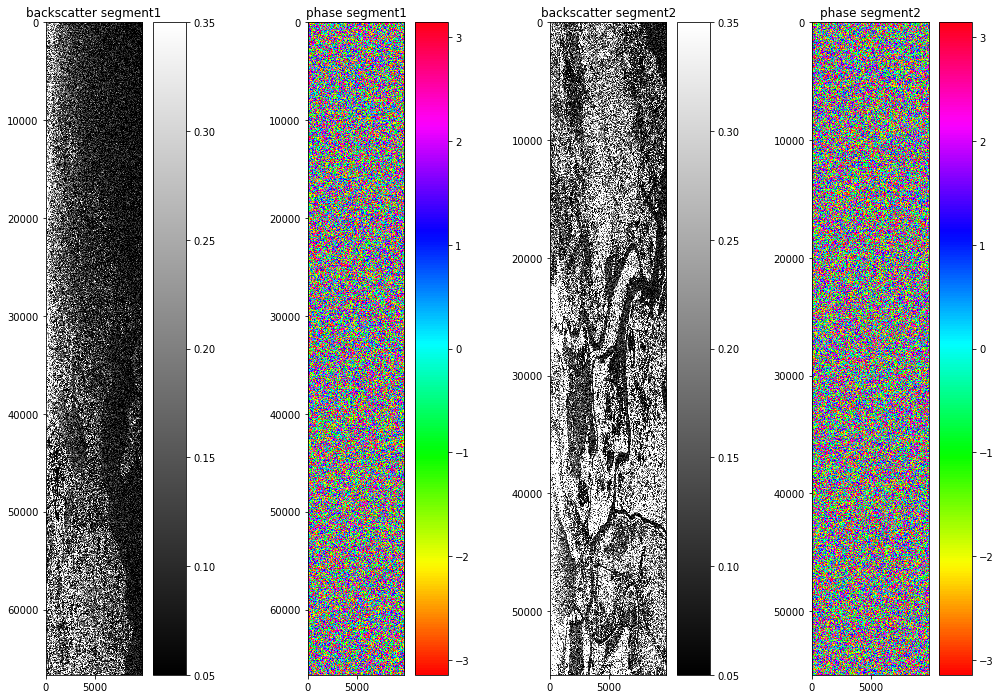

In [32]:
## 5. Plot data
fig = plt.figure(figsize=(18, 12))
# display backscatter of the slc
ax = fig.add_subplot(1,4,1)
cax = ax.imshow(backscatter_seg1, vmin=0.05, vmax=0.35, cmap='gray')
ax.set_title("backscatter segment1")
cbar = fig.colorbar(cax, orientation='vertical')
#display phase of the slc
ax = fig.add_subplot(1,4,2)
cax = ax.imshow(phase_seg_1, cmap='hsv')
ax.set_title("phase segment1")
cbar = fig.colorbar(cax, orientation='vertical')
# display backscatter of the slc
ax = fig.add_subplot(1,4,3)
cax = ax.imshow(backscatter_seg2, vmin=0.05, vmax=0.35, cmap='gray')
ax.set_title("backscatter segment2")
cbar = fig.colorbar(cax, orientation='vertical')
#display phase of the slc
ax = fig.add_subplot(1,4,4)
cax = ax.imshow(phase_seg_2, cmap='hsv')
ax.set_title("phase segment2")
cbar = fig.colorbar(cax, orientation='vertical')

plt.show()


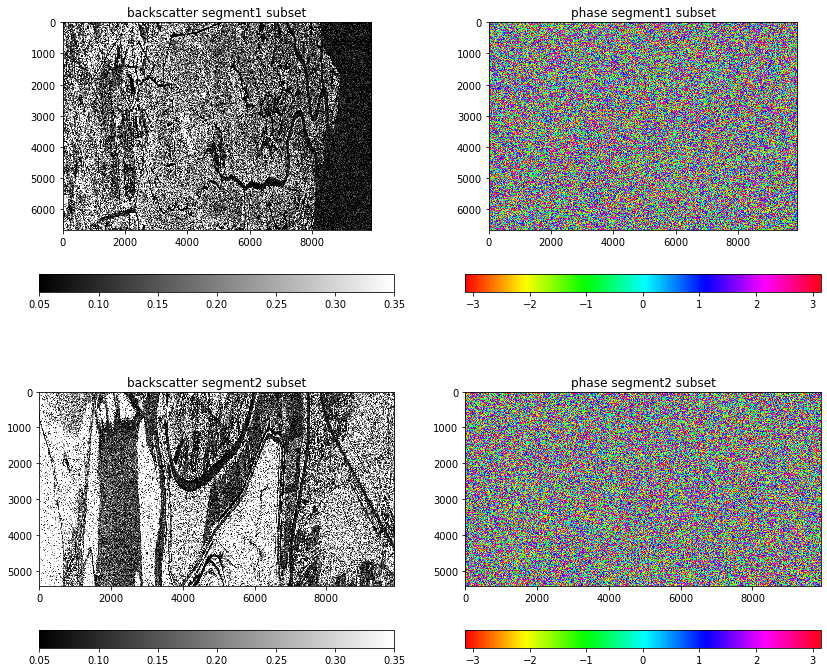

In [34]:
## Plot a subset
fig = plt.figure(figsize=(14, 12))
# display backscatter of the slc
ax = fig.add_subplot(2,2,1)
cax = ax.imshow(backscatter_seg1[60000:,0:], vmin=0.05, vmax=0.35, cmap='gray')
ax.set_title("backscatter segment1 subset")
cbar = fig.colorbar(cax, orientation='horizontal')
#display phase of the slc
ax = fig.add_subplot(2,2,2)
cax = ax.imshow(phase_seg_1[60000:,0:], cmap='hsv')
ax.set_title("phase segment1 subset")
cbar = fig.colorbar(cax, orientation='horizontal')
# display backscatter of the slc
ax = fig.add_subplot(2,2,3)
cax = ax.imshow(backscatter_seg2[50000:,0:], vmin=0.05, vmax=0.35, cmap='gray')
ax.set_title("backscatter segment2 subset")
cbar = fig.colorbar(cax, orientation='horizontal')
#display phase of the slc
ax = fig.add_subplot(2,2,4)
cax = ax.imshow(phase_seg_2[50000:,0:], cmap='hsv')
ax.set_title("phase segment2 subset")
cbar = fig.colorbar(cax, orientation='horizontal')

plt.show()


### 6. Generate a single array using the acquisition segments.

In [37]:
## 6. Generate a single array using the acquisition segments.
## We take the backscatter segments and generate 1 full array. 

# Generate empty array that will be used to store the full slc.
merged_backscatter = np.zeros(((rows_s1 + rows_s2), cols_s1 ), np.float32)

# add tiles
merged_backscatter[ 0:rows_s1, :] = backscatter_seg1
merged_backscatter[ rows_s1:, :] = backscatter_seg2

print('new array info', merged_backscatter.shape, merged_backscatter.dtype)


new array info (122072, 9900) float32


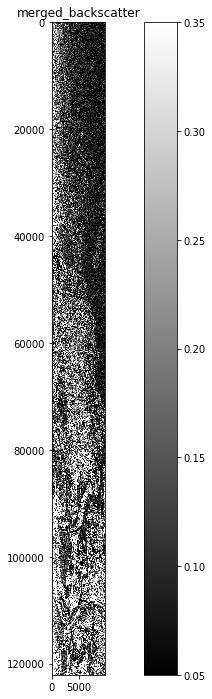

In [39]:
## Generate visualization of the new backscatter array

fig = plt.figure(figsize=(14, 12))
# display backscatter of the slc
ax = fig.add_subplot(1,1,1)
cax = ax.imshow(merged_backscatter, vmin=0.05, vmax=0.35, cmap='gray')
ax.set_title("merged_backscatter")
cbar = fig.colorbar(cax, orientation='vertical')
